In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AmenaNajeeb/Data/master/data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns()

TypeError: 'Index' object is not callable

In [5]:
df.column()

AttributeError: 'DataFrame' object has no attribute 'column'

In [6]:
df.shape()

TypeError: 'tuple' object is not callable

In [7]:
df.shape

(891, 12)

In [8]:
df.column

AttributeError: 'DataFrame' object has no attribute 'column'

In [10]:
del df['Cabin']

In [11]:
del df['PassengerId']

In [12]:
del df['Ticket']

In [13]:
del df['Name']

In [14]:
df.shape

(891, 8)

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
df['Age'].mean()

29.69911764705882

In [18]:
df['Age']=df['Age'].fillna(30)

In [19]:
df['Embarked']=df['Embarked'].fillna('S')

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
var=df.select_dtypes('object').columns

In [24]:
var

Index(['Sex', 'Embarked'], dtype='object')

In [25]:
for i in var:
    df[i]=le.fit_transform(df[i])

In [26]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [27]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [28]:
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model=DecisionTreeClassifier()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred=model.predict(x_test)

In [40]:
y_pred[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [41]:
y_test[:5]

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64

In [42]:
model.score(x_train,y_train)
print("Training Accuracy: ",model.score(x_train,y_train))

Training Accuracy:  0.9775429326287979


In [43]:
print("Train Accuracy: ",model.score(x_train,y_train))
print("Test Accuracy: ",model.score(x_test,y_test))

Train Accuracy:  0.9775429326287979
Test Accuracy:  0.7910447761194029


In [44]:
from sklearn import tree

[Text(96.31931669137774, 212.004, 'X[1] <= 0.5\ngini = 0.471\nsamples = 757\nvalue = [470, 287]'),
 Text(45.89753649635037, 201.132, 'X[0] <= 2.5\ngini = 0.385\nsamples = 265\nvalue = [69, 196]'),
 Text(19.55036496350365, 190.26, 'X[2] <= 2.5\ngini = 0.108\nsamples = 140\nvalue = [8, 132]'),
 Text(17.106569343065694, 179.388, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(21.994160583941607, 179.388, 'X[5] <= 28.856\ngini = 0.096\nsamples = 139\nvalue = [7, 132]'),
 Text(17.106569343065694, 168.516, 'X[5] <= 28.231\ngini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(14.662773722627737, 157.644, 'X[2] <= 56.0\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(9.775182481751825, 146.772, 'X[4] <= 0.5\ngini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(7.331386861313868, 135.9, 'X[5] <= 12.675\ngini = 0.193\nsamples = 37\nvalue = [4, 33]'),
 Text(4.887591240875913, 125.02799999999999, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(9.775182481751825, 125.02799999999999, 'X[2] 

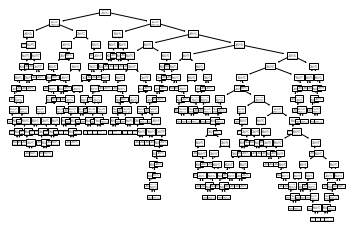

In [45]:
tree.plot_tree(model)

In [46]:
#Hyper-Parameter Tuning

In [47]:
model1=DecisionTreeClassifier(max_leaf_nodes=10)#max 10 leafs bro 

In [48]:
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print("Train Accuracy: ",model1.score(x_train,y_train))
print("Test Accuracy: ",model1.score(x_test,y_test))

Train Accuracy:  0.8401585204755614
Test Accuracy:  0.8208955223880597


[Text(141.64615384615385, 199.32, 'X[1] <= 0.5\ngini = 0.471\nsamples = 757\nvalue = [470, 287]'),
 Text(51.50769230769231, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.385\nsamples = 265\nvalue = [69, 196]'),
 Text(25.753846153846155, 126.83999999999999, 'gini = 0.108\nsamples = 140\nvalue = [8, 132]'),
 Text(77.26153846153846, 126.83999999999999, 'X[5] <= 23.35\ngini = 0.5\nsamples = 125\nvalue = [61, 64]'),
 Text(51.50769230769231, 90.6, 'X[2] <= 36.5\ngini = 0.481\nsamples = 102\nvalue = [41, 61]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.463\nsamples = 96\nvalue = [35, 61]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(103.01538461538462, 90.6, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(231.7846153846154, 163.07999999999998, 'X[2] <= 13.5\ngini = 0.301\nsamples = 492\nvalue = [401, 91]'),
 Text(180.27692307692308, 126.83999999999999, 'X[3] <= 2.5\ngini = 0.492\nsamples = 32\nvalue = [14, 18]'),
 Text(154.5

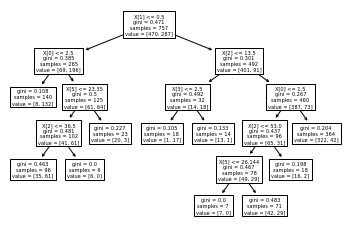

In [49]:
tree.plot_tree(model1)